In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
##### Min_Max Scaling function #####

def min_max_scale(df):
    return (df - df.min()) / (df.max() - df.min())

In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np



file_path = '/content/drive/MyDrive/Housepriceprediction - Housepriceprediction.csv'  # defining the file path in the GDrive

df = pd.read_csv(file_path) #Importing the House Price Data

df = df.drop(columns=['Id'], axis=1)  #Remove the Id column as it doesn't convey any information

# print(df.head())

# print(len(df))

X, y = df.iloc[:, :-1], df.iloc[:, -1] #Separating features and target variable
# print(X.head())
# ones = np.ones((X.shape[0], 1))
# X_normal = np.concatenate((ones, X), axis=1)
# print(X_normal[:5])
# theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# print(type(theta_normal))
# print(theta_normal)

# print(X.head())
# print(y.head())

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)  #splitting the dataset into train set and test set

train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:, -1] #Feature set(X) and target variable(y) of train set
test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1]  #Feature set(X) and target variable(y) of test set

# print(train_X.head())
# print(train_y.head())
# print(test_X.head())
# print(test_y.head())



#####################   Each feature and target variiable of both train and test set being Scaled   #######################
scaled_train_X = min_max_scale(train_X)
scaled_train_y = min_max_scale(train_y)
scaled_test_X = min_max_scale(test_X)
scaled_test_y = min_max_scale(test_y)
#####################   Each feature and target variiable of both train and test set being Scaled   #######################

# print(X[:5])
# print(y.head())

[[1.000e+00 8.450e+03 7.000e+00 8.560e+02 1.710e+03 8.000e+00 2.000e+00
  5.480e+02]
 [1.000e+00 9.600e+03 6.000e+00 1.262e+03 1.262e+03 6.000e+00 2.000e+00
  4.600e+02]
 [1.000e+00 1.125e+04 7.000e+00 9.200e+02 1.786e+03 6.000e+00 2.000e+00
  6.080e+02]
 [1.000e+00 9.550e+03 7.000e+00 9.610e+02 1.717e+03 7.000e+00 3.000e+00
  6.420e+02]
 [1.000e+00 1.426e+04 8.000e+00 1.145e+03 2.198e+03 9.000e+00 3.000e+00
  8.360e+02]]
<class 'numpy.ndarray'>
[ 4.51371306e-01  1.52880487e+04  1.47230310e+01  7.64969452e+01
 -1.33253870e+04  1.74718948e+04  1.89997435e+01]


In [42]:
#####  Pearson's Correlation

feature_names = X.columns.tolist()
# print(feature_names)

for i in feature_names:
  correlation = X[i].corr(y)
  print(f"Correlation between {i} and target variable: ", correlation)


Correlation between LotArea and target variable:  0.2638433538714056
Correlation between OverallQual and target variable:  0.7909816005838044
Correlation between 1stFlrSF and target variable:  0.6058521846919147
Correlation between GrLivArea and target variable:  0.7086244776126523
Correlation between TotRmsAbvGrd and target variable:  0.5337231555820282
Correlation between GarageCars and target variable:  0.6404091972583529
Correlation between GarageArea and target variable:  0.6234314389183618


In [43]:
import torch

In [44]:
####### Function to calculate linear regression model: theta_1*x_1 + theta_2*x_2 + ... + theta_n*x_n #########

def f1(X,Theta):
  return torch.matmul(X,Theta)

In [45]:
########### Function to calculate Loss: Mean Squared Error Loss  #########################

def J2(X,Theta,y):
  return (torch.mean(torch.square(f1(X,Theta) - y))/2)

In [46]:
X_train = torch.tensor(scaled_train_X.values, dtype=torch.float32)  ############### Converting pandas dataframe to Torch Tensor to apply the torch.backward() to calculate gradient #####################
ones_column = torch.ones(X_train.shape[0], 1)###############  creating the 1's column for cancatenating #########################
X_train = torch.cat((ones_column, X_train), dim=1)####################  Concatenating a column of 1's to account for the Bias Term  #####################
y_train = torch.tensor(scaled_train_y.values, dtype=torch.float32)  ##########   Converting pandas dataframe to Torch Tensor   ################
# print(X_train[0])


###############   Doing the same as above for  Test Data  ####################
X_test = torch.tensor(scaled_test_X.values, dtype=torch.float32)
ones_column = torch.ones(X_test.shape[0], 1)
X_test = torch.cat((ones_column, X_test), dim=1)
y_test = torch.tensor(scaled_test_y.values, dtype=torch.float32)
# print(X_test[0])

tensor([1.0000, 0.0425, 0.6667, 0.3093, 0.2540, 0.4167, 0.5000, 0.3738])
tensor([1.0000, 0.0999, 0.5000, 0.2432, 0.1533, 0.3333, 0.2500, 0.1899])


In [56]:
####### Calculation of Theta using Normal Equation  ###############

X_train_tr = X_train.t()  #####  X_t = Transpose(X) #######
X_tr_X = torch.matmul(X_train_tr, X_train)  #####  X_t.X  #####
X_tr_X_inv = torch.inverse(X_tr_X)  #####  (X_t.X)^-1  #####
X_tr_X_inv_X_train_tr = torch.matmul(X_tr_X_inv, X_train_tr)  #####  (X_t.X)^-1.X_t  #####
theta_normal = torch.matmul(X_tr_X_inv_X_train_tr, y_train)  #####  Theta = (X_t.X)^-1.X_t.y  #####
print(theta_normal)
# print(X_train_tr)

tensor([-0.1290,  0.1873,  0.3350,  0.1405,  0.2677, -0.0091,  0.1014,  0.0209])


In [60]:
#############   Evaluation of Normal Equation using R2 score   ##############

from sklearn.metrics import r2_score

y_test_pred_normal = f1(X_test, theta_normal)
loss_test_normal = J2(X_test, theta_normal, y_test)
print(f"Normal Loss: {loss_test_normal.item()}")

score_test = r2_score(y_test.detach().numpy(), y_test_pred_normal.detach().numpy())
print(f"Test R² Score: {score_test:.4f}")

Normal Loss: 0.001582955475896597
Test R² Score: 0.7650


In [61]:
############   Linear Regression model using Scikit Learn's library function   #################

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

#######  Evaluation of model  ########
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Coefficient(s): [ 0.          0.18728438  0.33496222  0.14050885  0.26770347 -0.00908843
  0.1014021   0.02090825]
Intercept: -0.12898134
Mean Squared Error: 0.003165904898196459
R² Score: 0.7650092840194702


# Gradient Descent Implementation

In [47]:
# Theta = torch.tensor([0.0] * len(X_train[0]), requires_grad=True)
torch.manual_seed(42)
Theta = torch.randn(8, requires_grad=True)

In [48]:
lr = 0.001  #### Learning Rate ####

Streaming output truncated to the last 5000 lines.
Iteration 5001/10000, Loss: 0.026534339413046837
Iteration 5002/10000, Loss: 0.026533514261245728
Iteration 5003/10000, Loss: 0.02653268538415432
Iteration 5004/10000, Loss: 0.02653185836970806
Iteration 5005/10000, Loss: 0.026531031355261803
Iteration 5006/10000, Loss: 0.026530206203460693
Iteration 5007/10000, Loss: 0.026529377326369286
Iteration 5008/10000, Loss: 0.026528552174568176
Iteration 5009/10000, Loss: 0.02652772329747677
Iteration 5010/10000, Loss: 0.02652689628303051
Iteration 5011/10000, Loss: 0.02652606926858425
Iteration 5012/10000, Loss: 0.026525242254137993
Iteration 5013/10000, Loss: 0.026524418964982033
Iteration 5014/10000, Loss: 0.026523590087890625
Iteration 5015/10000, Loss: 0.026522763073444366
Iteration 5016/10000, Loss: 0.02652193419635296
Iteration 5017/10000, Loss: 0.02652110904455185
Iteration 5018/10000, Loss: 0.02652028203010559
Iteration 5019/10000, Loss: 0.02651945874094963
Iteration 5020/10000, Loss:

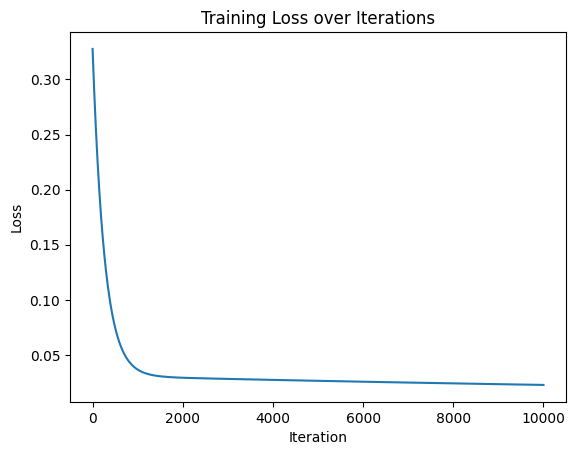

In [49]:
import matplotlib.pyplot as plt

loss_history = []

num_iterations = 10000
for i in range(num_iterations):
    # Forward pass: compute predictions and loss
    y_pred = f1(X_train, Theta)        # Model's prediction
    loss = J2(X_train, Theta, y_train) # loss function

    # Backward pass: compute gradients
    loss.backward()

    # Parameter update (gradient descent step)
    with torch.no_grad():   ### torch.no_grad() is to ensure that this step of updation is not included in the computation graph of Parameter variable Theta #########
        Theta -= lr * Theta.grad

    # IMPORTANT: Zero the gradients after updating
    Theta.grad.zero_()

    # Store the loss (convert from tensor to Python float)
    current_loss = loss.item()
    loss_history.append(current_loss)

    # Print the loss for each iteration
    print(f"Iteration {i+1}/{num_iterations}, Loss: {current_loss}")

# Plot the loss vs. iteration
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.show()

In [50]:
########  R2 score for Train Data

from sklearn.metrics import r2_score

score = r2_score(y_train.detach().numpy(), y_pred.detach().numpy())
print(f"R² Score: {score:.4f}")

R² Score: -2.8240


In [51]:
#######  R2 score for Test Data

y_pred_test = f1(X_test, Theta)
loss_test = J2(X_test, Theta, y_test)
print(f"Test Loss: {loss_test.item()}")

score_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
print(f"Test R² Score: {score_test:.4f}")

Test Loss: 0.030000828206539154
Test R² Score: -3.4537


# Testing/Experiments

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)  # Optional: for reproducibility
df1 = pd.DataFrame(np.random.randint(0, 100, size=(5, 5)))

print(df)

    0   1   2   3   4
0  51  92  14  71  60
1  20  82  86  74  74
2  87  99  23   2  21
3  52   1  87  29  37
4   1  63  59  20  32


In [ ]:
def min_max_scale(df):
    return (df - df.min()) / (df.max() - df.min())

df_scaled = min_max_scale(df1)

print(df_scaled)

          0         1         2         3         4
0  0.581395  0.928571  0.000000  0.958333  0.735849
1  0.220930  0.826531  0.986301  1.000000  1.000000
2  1.000000  1.000000  0.123288  0.000000  0.000000
3  0.593023  0.000000  1.000000  0.375000  0.301887
4  0.000000  0.632653  0.616438  0.250000  0.207547


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)  # Optional: for reproducibility
df1 = pd.DataFrame(np.random.randint(0, 100, size=(5, 5)))

# print(df)

# df2 = df1.drop(columns=[4], axis=1)

# print(df2)

X, y = df1.iloc[:, :-1], df1.iloc[:, -1]

print(X)
print(y)

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Testing/Experiments

In [ ]:
import torch

In [ ]:
def f(X,Theta):
  return torch.dot(X,Theta)


In [ ]:
def f1(X,Theta):
  return torch.matmul(X,Theta)

In [ ]:
def J(X,Theta,y):
  # return torch.sum((f(X,Theta) - y)**2) / (2*len(X))
  # return torch.mean((f(X,Theta) - y)**2)
  # return torch.mean(torch.square(f(X,Theta) - y))
  return (torch.square(f(X,Theta) - y))/2

In [ ]:
def J2(X,Theta,y):
  return (torch.mean(torch.square(f1(X,Theta) - y))/2)

In [ ]:
X = torch.tensor([3.0, 5.0, 4.5])
Theta = torch.tensor([2.0, 4.0, -1.0], requires_grad=True)
y = torch.tensor(23.0)

y2 = J(X,Theta,y)
print(y2)
y2.backward()
print(Theta.grad)

# print(X)
# print(Theta)

# y = f(X,Theta)
# print(y)

# y.backward()
# print(Theta.grad)

tensor(1.1250, grad_fn=<DivBackward0>)
tensor([-4.5000, -7.5000, -6.7500])


In [ ]:
## Taking Dataset of 3 samples each having 3 features

X = torch.tensor([[3.0, 5.0, 4.5],
                  [2.5, -1.2, 2.32],
                  [5.1, 5.5, -2.3]])
Theta = torch.tensor([2.0, 4.0, -1.0], requires_grad=True)
y = torch.tensor([20.7, 1.5, 33.0])

# y1 = f1(X,Theta)
# print(y1)
# # len(X) == no. of samples
# print(y1 - y)
# print(torch.square(y1 - y))
# print(torch.sum(torch.square(y1 - y)))
# print(torch.mean(torch.square(y1 - y))/2)

y2 = J2(X,Theta,y)
print(y2)
y2.backward()
print(Theta.grad)
print(0.1*Theta.grad)
print(Theta - 0.1*Theta.grad)

tensor(2.6657, grad_fn=<DivBackward0>)
tensor([ 0.3333,  5.5313, -2.7495])
tensor([ 0.0333,  0.5531, -0.2749])
tensor([ 1.9667,  3.4469, -0.7251], grad_fn=<SubBackward0>)


In [ ]:
x = torch.tensor(3.0, requires_grad=True)

f = x**2 + 2*x + 1

f.backward()

print(x.grad)

tensor(8.)


In [ ]:
x1 = torch.tensor(2.0)
x2 = torch.tensor(5.0)
x3 = torch.tensor(7.0)

th1 = torch.tensor(0.0, requires_grad=True)
th2 = torch.tensor(0.0, requires_grad=True)
th3 = torch.tensor(0.0, requires_grad=True)

f = th1 * x1 + th2 * x2 + th3 * x3



f.backward()

print(th1.grad)
print(th2.grad)
print(th3.grad)